Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'hurst'

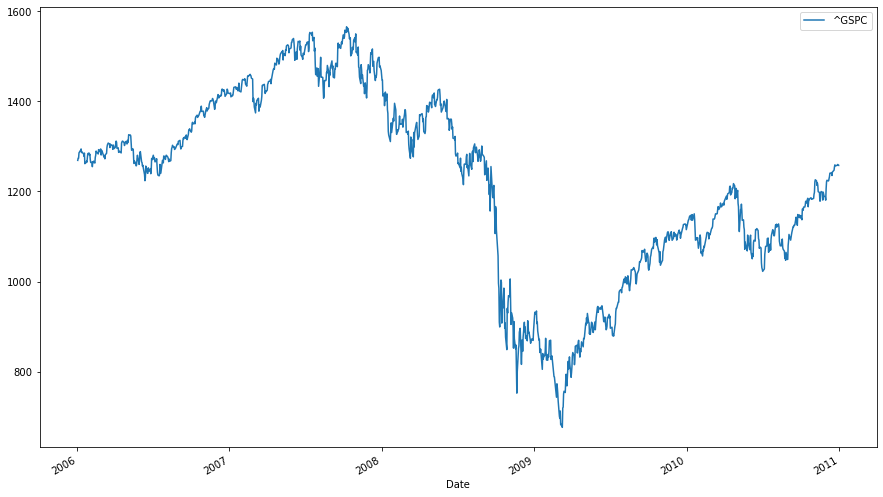

In [5]:
import pandas as pd

import datetime

import numpy as np
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2010,12,31)
#end = datetime.date.today()


from pandas_datareader import data as wb  

ticker = '^GSPC' 
df = pd.DataFrame()

df[ticker] = wb.DataReader(ticker, data_source='yahoo', start=start, end=end)['Close']




import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

df.plot(grid = False) # Plot the adjusted closing price
close = df[ticker]



from hurst import compute_Hc, random_walk


# Evaluate Hurst equation
H, c, data = compute_Hc(close, kind='price', simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()
print("H={:.4f}, c={:.4f}".format(H,c))


n = len(close)

simulation = random_walk(n, proba=H)


plt.plot(simulation)
plt.title('Simulated price H=%5.3f'%(H))
plt.show()
